# Project

## Name: LINZHUO ZHANG

## Link to your PROJECT github repo: https://github.com/data1030-fall2024/ps2-zlzdeGH

### environment:

In [4]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


### Problem 1: EDA

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
per species). Each mushroom is identified as definitely edible, definitely poisonous, or of
unknown edibility and not recommended (the latter class was combined with the poisonous class).

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secondary_data.csv',sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


**Q1** How many rows and columns do we have in the dataframe? (2 point)

In [15]:
# your code here 
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 61069
Number of columns: 21


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

In [17]:
# your code here
pd.set_option("display.max_rows",None)
print(df.dtypes)
pd.reset_option("display.max_rows")


class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


**Q3** The ML target variable in this dataset is the class. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.
### Class Labels
edible=e, poisonous=p

In [19]:
# your code here
#print(df['class'].describe())
print(df['class'].value_counts())

class
p    33888
e    27181
Name: count, dtype: int64


**Q4** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data. (4 points)

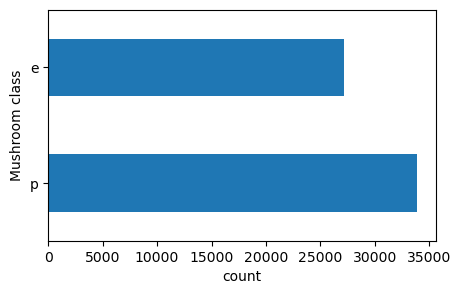

In [20]:
# your code here 
import numpy as np
import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(5,3))
df['class'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Mushroom class')
plt.show()

### Problem 2: visualization

Find one continuous, one ordinal, and one categorical feature that strongly correlates with the sale price. Create figures that illustrate your selected features and the sale price.

Don't forget to add axis labels and titles, and find apropriate arguments. Write figure captions to explain what the figure shows.

We will cover techniques in a week or two to quantitatively assess how strongly each feature correlates with the target variable. For now, we do a qualitative/visual assessment.

### Categorical Feature VS Continuous

In [22]:
df['cap-diameter'].describe()

count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap-diameter, dtype: float64

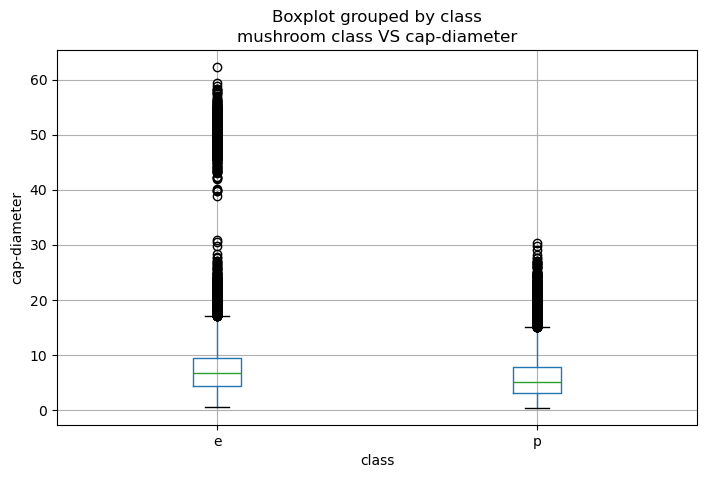

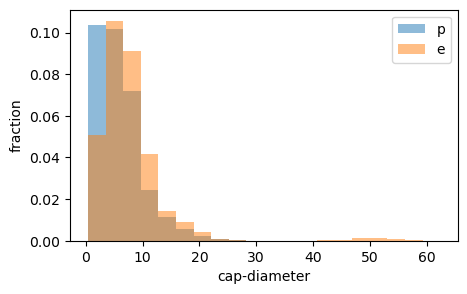

In [54]:
df[['cap-diameter','class']].boxplot(by='class',figsize=(8,5))
plt.title('mushroom class VS cap-diameter')
plt.xlabel('class')
plt.ylabel('cap-diameter')
plt.show()

import matplotlib
from matplotlib import pylab as plt

categories = df['class'].unique()
bin_range = (df['cap-diameter'].min(),df['cap-diameter'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['class']==c]['cap-diameter'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('cap-diameter')
plt.show()

In [28]:
df['stem-height'].describe()

count    61069.000000
mean         6.581538
std          3.370017
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem-height, dtype: float64

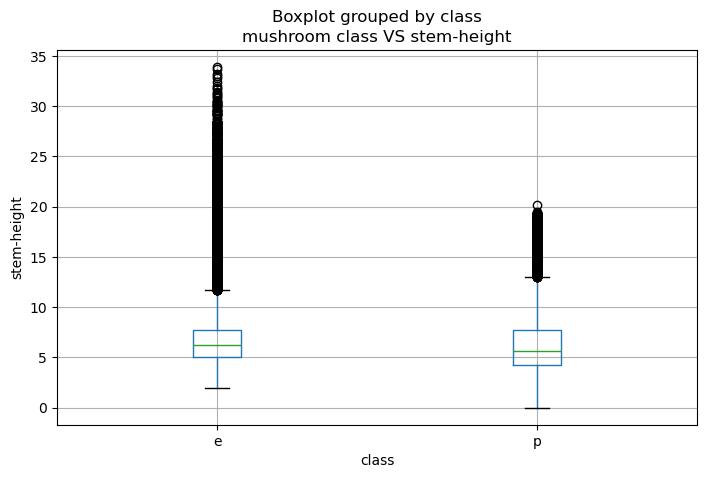

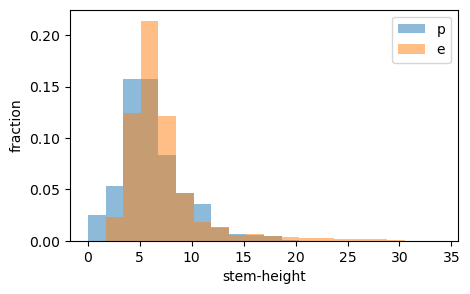

In [55]:
df[['stem-height','class']].boxplot(by='class',figsize=(8,5))
plt.title('mushroom class VS stem-height')
plt.xlabel('class')
plt.ylabel('stem-height')
plt.show()

import matplotlib
from matplotlib import pylab as plt

categories = df['class'].unique()
bin_range = (df['stem-height'].min(),df['stem-height'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['class']==c]['stem-height'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('stem-height')
plt.show()

In [30]:
df['stem-width'].describe()

count    61069.000000
mean        12.149410
std         10.035955
min          0.000000
25%          5.210000
50%         10.190000
75%         16.570000
max        103.910000
Name: stem-width, dtype: float64

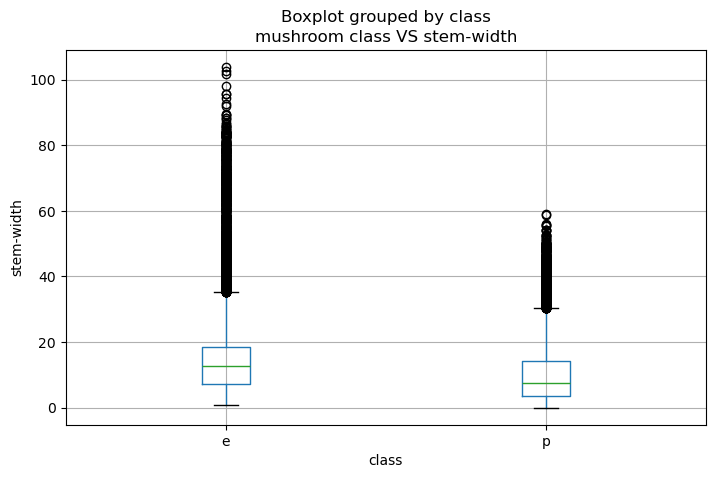

In [31]:
df[['stem-width','class']].boxplot(by='class',figsize=(8,5))
plt.title('mushroom class VS stem-width')
plt.xlabel('class')
plt.ylabel('stem-width')
plt.show()

### Categorical Feature VS Categorical Feature

season (n): spring=s, summer=u, autumn=a, winter=w

Class Labels: edible=e, poisonous=p

In [52]:
season_map = {
    's': 'spring',
    'u': 'summer',
    'a': 'fall',
    'w': 'winter'
}

df['season'] = df['season'].map(season_map)

count_matrix = df.groupby(['season', 'class']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

class       e      p
season              
fall    12785  17392
spring   1553   1174
summer   9647  13251
winter   3196   2071
class          e         p
season                    
fall    0.423667  0.576333
spring  0.569490  0.430510
summer  0.421303  0.578697
winter  0.606797  0.393203


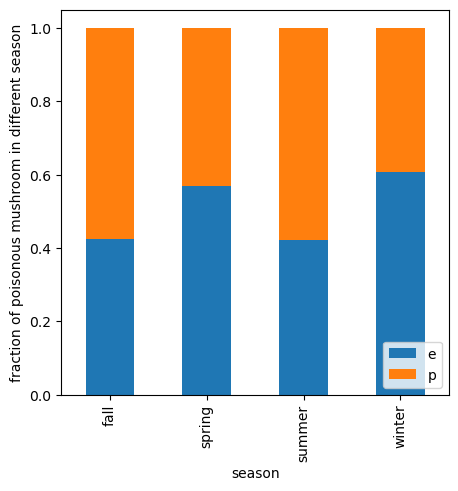

In [53]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,5))
plt.ylabel('fraction of poisonous mushroom in different season')
plt.legend(loc=4)
plt.show()

### Problem3: Missing Value

**1. Drop the columns with missing values:**

In [41]:
# drop features with missing values
df_c = df.dropna(axis=1)
print(df.shape)
print(df_c.shape)
print(df_c.head())

(61069, 21)
(61069, 12)
  class  cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
0     p         15.26         x         o                    f          w   
1     p         16.60         x         o                    f          w   
2     p         14.07         x         o                    f          w   
3     p         14.17         f         e                    f          w   
4     p         14.64         x         o                    f          w   

   stem-height  stem-width stem-color has-ring habitat season  
0        16.95       17.09          w        t       d      w  
1        17.99       18.19          w        t       d      u  
2        17.80       17.74          w        t       d      w  
3        15.77       15.98          w        t       d      w  
4        16.53       17.20          w        t       d      w  


**2. Drop the rows with missing values:**

In [42]:
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)

(61069, 21)
(0, 21)


**3. Mean or median imputation:**

### Problem4: Split and preprocess the dataset

In [46]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#np.random.seed(0)

# let's separate the feature matrix X, and target variable y
y = df['class'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'class'] # all other columns are features

random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

False


In [43]:
# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 
               'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 
                'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 
                'habitat', 'season']
X_train[onehot_ftrs] = X_train[onehot_ftrs].fillna('Missing')
X_val[onehot_ftrs] = X_val[onehot_ftrs].fillna('Missing')
X_test[onehot_ftrs] = X_test[onehot_ftrs].fillna('Missing')

std_ftrs = ['cap-diameter','stem-height','stem-width']
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(36641, 20)
(36641, 128)
[[ 0.          0.          0.         ...  0.19707561  2.26276824
  -0.39490717]
 [ 0.          0.          0.         ...  2.40760156 -0.20567
   1.41101066]
 [ 0.          0.          0.         ...  0.40239356  0.47918018
   0.23716407]
 ...
 [ 0.          0.          1.         ...  1.06823775  1.25335863
   0.11412352]
 [ 0.          0.          0.         ...  0.01286512 -0.04487909
   0.41180228]
 [ 0.          0.          0.         ...  0.07810634 -1.48008684
   0.27586231]]


In [8]:
print(df['cap-surface'].value_counts())

cap-surface
t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: count, dtype: int64


In [15]:
print(df['spore-print-color'].value_counts())

spore-print-color
k    2118
p    1259
w    1212
n    1059
g     353
u     182
r     171
Name: count, dtype: int64


In [56]:
print(df.value_counts())

Series([], Name: count, dtype: int64)


In [57]:
import pandas as pd


df = pd.read_csv('secondary_data.csv',sep=';')


missing_percentage = df.isnull().mean() * 100


missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)


print(missing_percentage)


veil-type            94.797688
spore-print-color    89.595376
veil-color           87.861272
stem-root            84.393064
stem-surface         62.427746
gill-spacing         41.040462
cap-surface          23.121387
gill-attachment      16.184971
ring-type             4.046243
dtype: float64
